### Step 1: Install necessary libraries

In [130]:
pip install pandas yfinance


Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


### Step 2: Import required libraries

In [132]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



### Step 3: Download historical S&P500 data using yfinance

In [133]:
# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"

data = yf.download(symbol, start=start_date, end=end_date)

# Display the top 10 rows of the dataset
print("Top 10 rows of the dataset:")
print(data.head(10))


[*********************100%%**********************]  1 of 1 completed
Top 10 rows of the dataset:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   
1990-01-09  353.829987  354.170013  349.609985  349.619995  349.619995   
1990-01-10  349.619995  349.619995  344.320007  347.309998  347.309998   
1990-01-11  347.309998  350.140015  347.309998  348.529999  348.529999   
1990-01-12  348.529999  348.529999  339.489990  339.929993  339.929993   
1990-01-15  339.929993  339.940002  336.570007  337.000000  337.000000   

              

In [134]:
# View information about the output
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8502 entries, 1990-01-02 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8502 non-null   float64
 1   High       8502 non-null   float64
 2   Low        8502 non-null   float64
 3   Close      8502 non-null   float64
 4   Adj Close  8502 non-null   float64
 5   Volume     8502 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 465.0 KB


### Plot actual line graph of S&P500 to visualize it

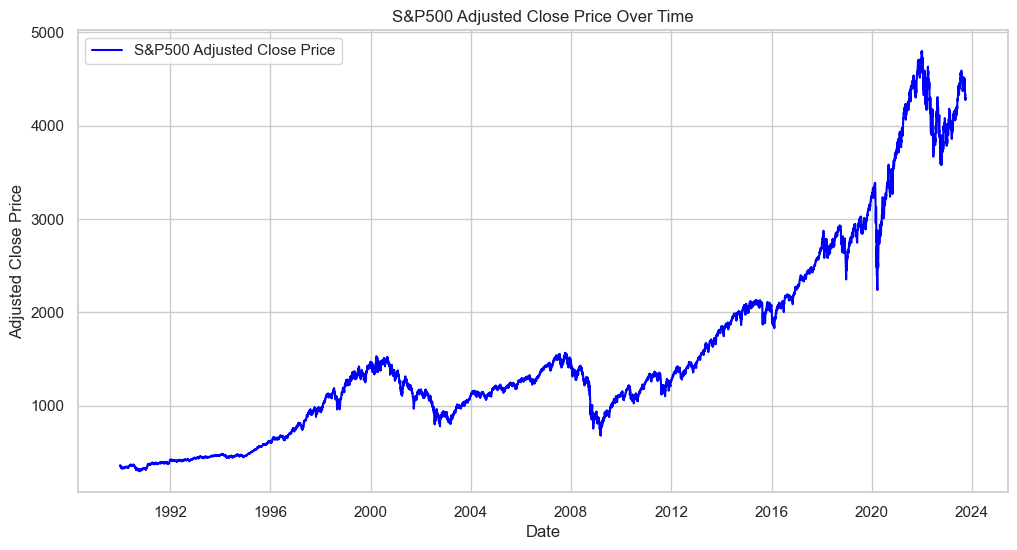

In [135]:
# Plot a line graph
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='S&P500 Adjusted Close Price', color='blue')
plt.title('S&P500 Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### Step 4: Implement your momentum trading strategy

In [136]:
# First create new columns for calculation
# Calculate daily returns
data['returns'] = data['Adj Close'].pct_change()

# Drop the NaN value in the first row
data = data.dropna()

# Display the updated DataFrame
print(data.head())


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   
1990-01-09  353.829987  354.170013  349.609985  349.619995  349.619995   

               Volume   returns  
Date                             
1990-01-03  192330000 -0.002586  
1990-01-04  177000000 -0.008613  
1990-01-05  158530000 -0.009756  
1990-01-08  140110000  0.004514  
1990-01-09  155210000 -0.011787  


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8501 entries, 1990-01-03 to 2023-09-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8501 non-null   float64
 1   High       8501 non-null   float64
 2   Low        8501 non-null   float64
 3   Close      8501 non-null   float64
 4   Adj Close  8501 non-null   float64
 5   Volume     8501 non-null   int64  
 6   returns    8501 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 531.3 KB


In [138]:
import pandas as pd

# Assuming 'your_data' is the loaded DataFrame with a DatetimeIndex
data = pd.DataFrame(data)


In [139]:
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
1990-01-09   353.829987   354.170013   349.609985   349.619995   349.619995   
...                 ...          ...          ...          ...          ...   
2023-09-25  4310.620117  4338.509766  4302.700195  4337.439941  4337.439941   
2023-09-26  4312.879883  4313.009766  4265.979980  4273.529785  4273.529785   
2023-09-27  4282.629883  4292.069824  4238.629883  4274.509766  4274.509766   
2023-09-28  4269.649902  4317.270020  4264.379883  4299.700195  4299.700195   
2023-09-29  4328.180176  4333.149902  4274.859863  4

In [140]:
import datetime
import backtrader as bt
import pandas as pd

# Assuming 'data' is a DataFrame with a DatetimeIndex
# Check if 'data' is a Pandas DataFrame
if not isinstance(data, pd.DataFrame):
    raise ValueError("Data is not a Pandas DataFrame. Please check your data loading process.")

# Rename columns to match Backtrader's expected format
data = data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume', 'returns': 'returns'})

class MyStrategy(bt.Strategy):
    params = (
        ("lookback", 20),
        # Add other strategy parameters here
    )

    def __init__(self):
        self.data_close = self.datas[0].close
        self.sma = bt.indicators.SimpleMovingAverage(self.data_close, period=self.params.lookback)

    def next(self):
        if self.data_close > self.sma:
            # Implement your buy logic here
            self.buy()
        elif self.data_close < self.sma:
            # Implement your sell logic here
            self.sell()

# Create a Backtrader data feed
data_feed = bt.feeds.PandasData(dataname=data)

# Instantiate the Cerebro engine
cerebro = bt.Cerebro()

# Add your data feed to Cerebro
cerebro.adddata(data_feed)

# Add your strategy to Cerebro
cerebro.addstrategy(MyStrategy)

# Run the backtest
cerebro.run()


In [ ]:
import pandas as pd
import backtrader as bt
import datetime

# Load your data
# Assuming 'data' is a DataFrame with a DatetimeIndex
# Replace this with your actual DataFrame

# Rename columns to match Backtrader's expected format
data = data.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume', 'returns': 'returns'})

class MyStrategy(bt.Strategy):
    params = (
        ("lookback", 20),
        # Add other strategy parameters here
    )

    def __init__(self):
        self.lock_counter = 0

    def next(self):
        if self.lock_counter == 0:
            # Your strategy logic here
            pass

    def nextstart(self):
        self.lock_counter += 1

# Create a Cerebro engine
cerebro = bt.Cerebro()

# Create a Backtrader data feed
data = bt.feeds.PandasData(dataname=data, fromdate=datetime.datetime(1990, 1, 3), todate=datetime.datetime(2023, 9, 29))

# Add the data to the engine
cerebro.adddata(data)

# Add the strategy to the engine
cerebro.addstrategy(MyStrategy)

# Print the starting portfolio value
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
cerebro.run()

# Print the final portfolio value
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 10000.00
Ending Portfolio Value: 10000.00


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


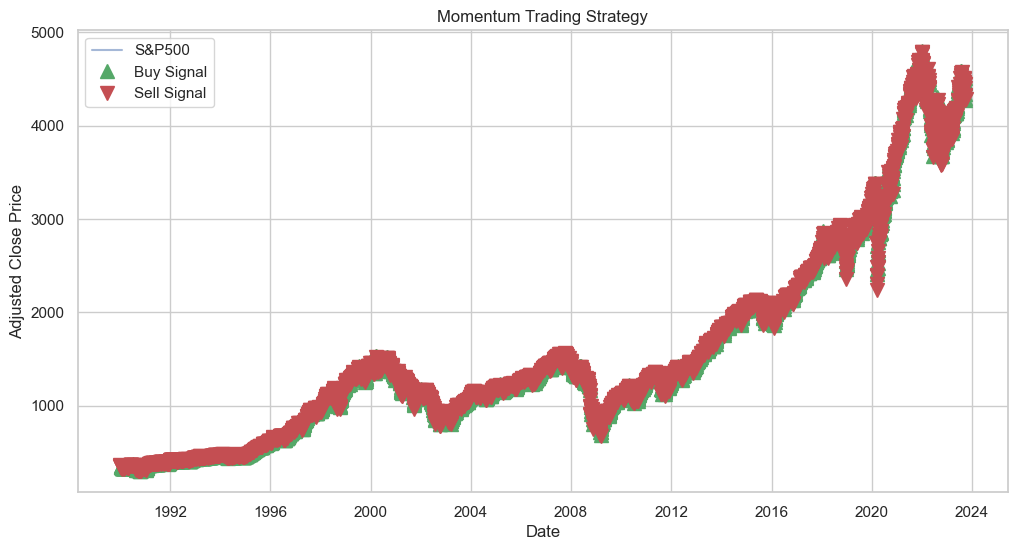

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def plot_strategy(data, signals):
    plt.figure(figsize=(12, 6))

    # Plot adjusted closing prices
    plt.plot(data['Adj Close'], label='S&P500', alpha=0.5)

    # Plot strategy signals
    buy_signals = data['Adj Close'][signals['positions'] == 1]
    sell_signals = data['Adj Close'][signals['positions'] == -1]

    plt.plot(buy_signals.index, buy_signals, '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(sell_signals.index, sell_signals, 'v', markersize=10, color='r', label='Sell Signal')

    plt.title('Momentum Trading Strategy')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Plot the strategy
plot_strategy(data, momentum_signals)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


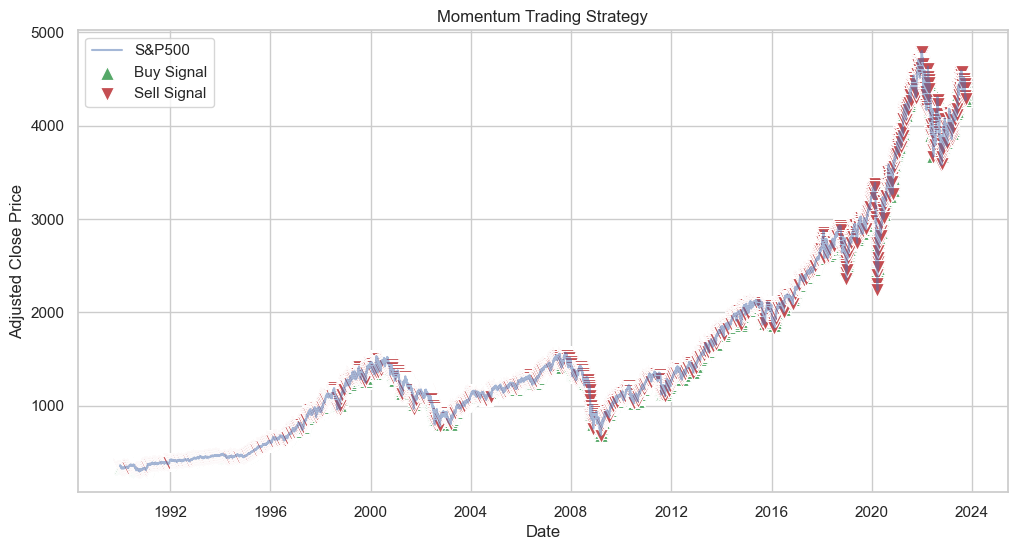

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def plot_strategy(data, signals):
    plt.figure(figsize=(12, 6))

    # Plot adjusted closing prices
    sns.lineplot(data=data['Adj Close'], label='S&P500', alpha=0.5)

    # Plot strategy signals
    buy_signals = data['Adj Close'][signals['positions'] == 1]
    sell_signals = data['Adj Close'][signals['positions'] == -1]

    sns.scatterplot(x=buy_signals.index, y=buy_signals.values, marker='^', s=100, color='g', label='Buy Signal')
    sns.scatterplot(x=sell_signals.index, y=sell_signals.values, marker='v', s=100, color='r', label='Sell Signal')

    plt.title('Momentum Trading Strategy')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Plot the strategy
plot_strategy(data, momentum_signals)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


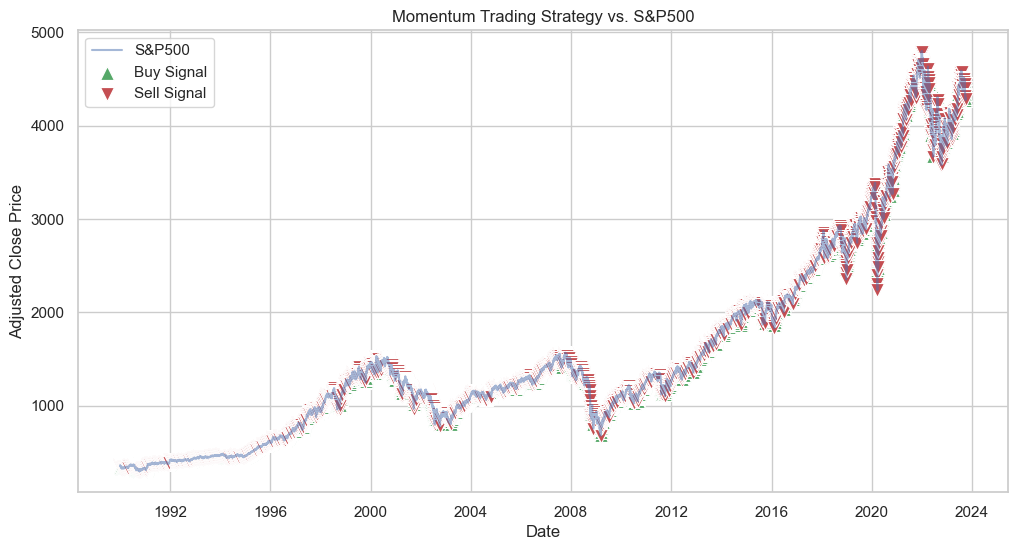

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def plot_strategy(data, signals):
    plt.figure(figsize=(12, 6))

    # Plot adjusted closing prices
    sns.lineplot(data=data['Adj Close'], label='S&P500', alpha=0.5)

    # Plot strategy signals
    buy_signals = data['Adj Close'][signals['positions'] == 1]
    sell_signals = data['Adj Close'][signals['positions'] == -1]

    sns.scatterplot(x=buy_signals.index, y=buy_signals.values, marker='^', s=100, color='g', label='Buy Signal')
    sns.scatterplot(x=sell_signals.index, y=sell_signals.values, marker='v', s=100, color='r', label='Sell Signal')

    plt.title('Momentum Trading Strategy vs. S&P500')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Plot the strategy along with raw S&P500 data
plot_strategy(data, momentum_signals)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


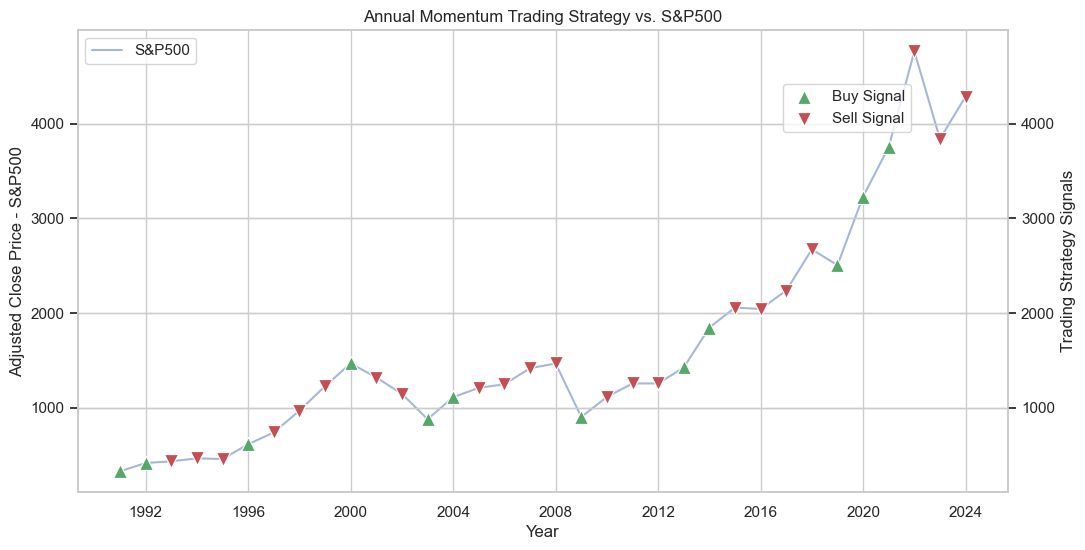

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def plot_strategy_annually(data, signals):
    # Resample the data and signals to annual frequency
    data_annual = data['Adj Close'].resample('A').last()
    signals_annual = signals['positions'].resample('A').last()

    plt.figure(figsize=(12, 6))

    # Plot S&P500 data
    ax1 = sns.lineplot(data=data_annual, label='S&P500', alpha=0.5)

    # Create a twin axis for the trading strategy
    ax2 = ax1.twinx()
    
    # Plot strategy signals on the twin axis
    buy_signals = data_annual[signals_annual == 1]
    sell_signals = data_annual[signals_annual == -1]

    sns.scatterplot(x=buy_signals.index, y=buy_signals.values, marker='^', s=100, color='g', label='Buy Signal', ax=ax2)
    sns.scatterplot(x=sell_signals.index, y=sell_signals.values, marker='v', s=100, color='r', label='Sell Signal', ax=ax2)

    plt.title('Annual Momentum Trading Strategy vs. S&P500')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Adjusted Close Price - S&P500')
    ax2.set_ylabel('Trading Strategy Signals')
    plt.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))  # Adjust the legend position
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Plot the strategy along with raw S&P500 data on an annual basis
plot_strategy_annually(data, momentum_signals)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


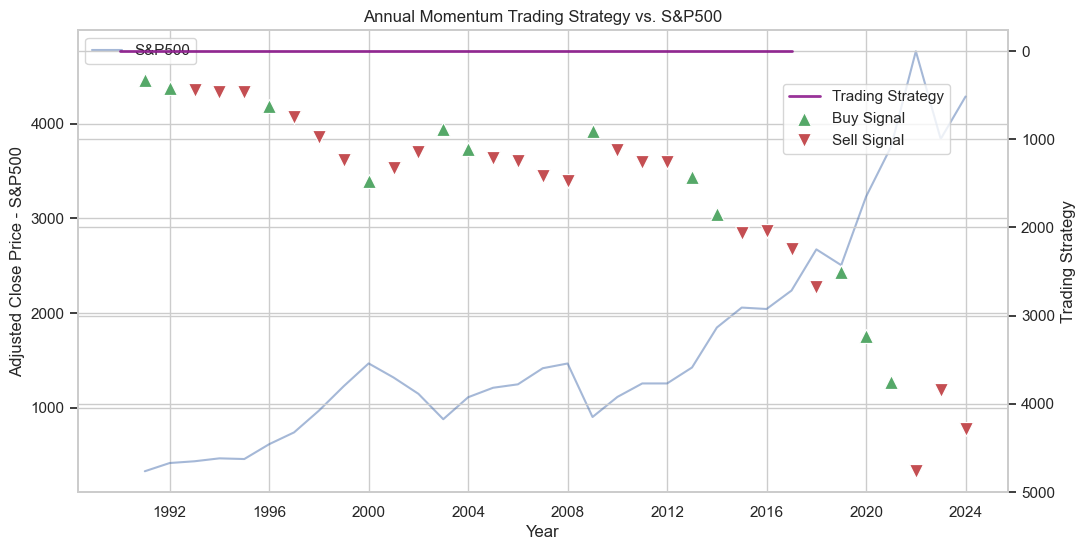

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def plot_strategy_annually(data, signals):
    # Resample the data and signals to annual frequency
    data_annual = data['Adj Close'].resample('A').last()
    signals_annual = signals['positions'].resample('A').last()

    plt.figure(figsize=(12, 6))

    # Plot S&P500 data
    ax1 = sns.lineplot(data=data_annual, label='S&P500', alpha=0.5)

    # Create a twin axis for the trading strategy
    ax2 = ax1.twinx()
    
    # Plot trading strategy as a separate line
    strategy_line = pd.Series(signals['positions'].replace({1: None, -1: None}))
    sns.lineplot(data=strategy_line, label='Trading Strategy', color='purple', alpha=0.8, linewidth=2, ax=ax2)

    # Highlight buy/sell signals on the trading strategy line
    sns.scatterplot(x=signals_annual[signals_annual == 1].index, y=data_annual[signals_annual == 1].values,
                    marker='^', s=100, color='g', label='Buy Signal', ax=ax2)
    sns.scatterplot(x=signals_annual[signals_annual == -1].index, y=data_annual[signals_annual == -1].values,
                    marker='v', s=100, color='r', label='Sell Signal', ax=ax2)

    plt.title('Annual Momentum Trading Strategy vs. S&P500')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Adjusted Close Price - S&P500')
    ax2.set_ylabel('Trading Strategy')
    plt.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))  # Adjust the legend position
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Plot the strategy along with raw S&P500 data on an annual basis
plot_strategy_annually(data, momentum_signals)


In [ ]:
def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    return signals


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8502 entries, 1990-01-02 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8502 non-null   float64
 1   High       8502 non-null   float64
 2   Low        8502 non-null   float64
 3   Close      8502 non-null   float64
 4   Adj Close  8502 non-null   float64
 5   Volume     8502 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 465.0 KB


### Step 5: Implement backtesting logic

In [ ]:
def backtest(data, signals):
    # Calculate daily portfolio returns
    data['strategy'] = data['Adj Close'].pct_change() * signals['positions'].shift(1)

    # Calculate cumulative returns
    data['cum_strategy'] = (1 + data['strategy']).cumprod()
    data['cum_returns'] = (1 + data['Adj Close'].pct_change()).cumprod()

    return data


### Step 6: Visualize the results


In [ ]:
def plot_results(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data['cum_returns'], label='S&P500')
    plt.plot(data['cum_strategy'], label='Momentum Strategy')
    plt.legend()
    plt.title('Backtest Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()


In [ ]:
import seaborn as sns

def plot_results(data):
    sns.set(style="whitegrid")  # Set the style of seaborn

    plt.figure(figsize=(10, 6))
    
    # Plot using seaborn lineplot
    sns.lineplot(data=data[['cum_returns', 'cum_strategy']])
    
    plt.title('Backtest Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend(['S&P500', 'Momentum Strategy'])
    plt.show()


In [ ]:
plot_results(data)

KeyError: "None of [Index(['cum_returns', 'cum_strategy'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

[*********************100%%**********************]  1 of 1 completed


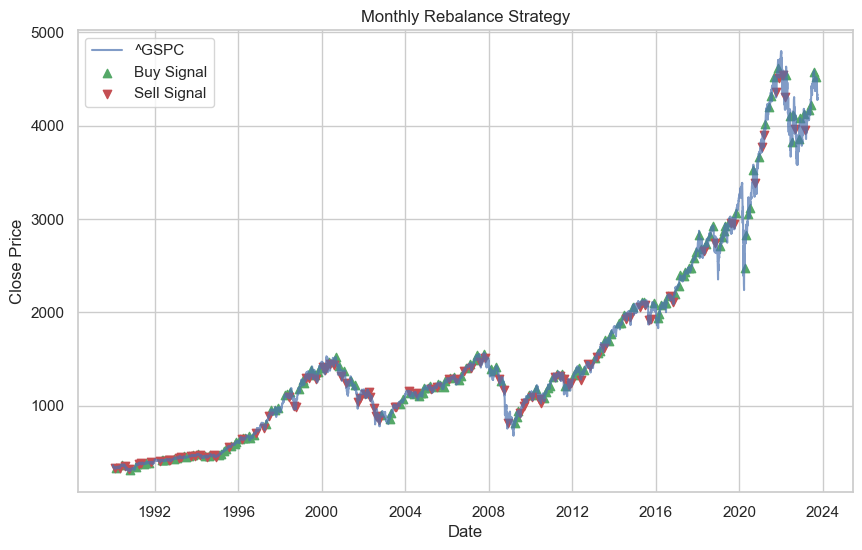

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to fetch historical data
def get_historical_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

# Function to implement the monthly rebalance strategy
def monthly_rebalance_strategy(data):
    # Calculate the price 12 months ago
    data['PriceTwelveMonthsAgo'] = data['Close'].shift(12)

    # Determine if it's the first day of the month
    data['IsFirstDayOfMonth'] = data.index.day == 1

    # Buy/Sell logic
    data['Signal'] = 'Hold'
    data.loc[data['IsFirstDayOfMonth'] & (data['Close'] > data['PriceTwelveMonthsAgo']), 'Signal'] = 'Buy'
    data.loc[data['IsFirstDayOfMonth'] & (data['Close'] < data['PriceTwelveMonthsAgo']), 'Signal'] = 'Sell'

    return data

# Main function to run the strategy
def run_strategy(symbol, start_date, end_date):
    # Fetch historical data
    data = get_historical_data(symbol, start_date, end_date)

    # Run the strategy
    data = monthly_rebalance_strategy(data)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label=symbol, alpha=0.7)
    plt.scatter(data.index[data['Signal'] == 'Buy'], data['Close'][data['Signal'] == 'Buy'], marker='^', color='g', label='Buy Signal')
    plt.scatter(data.index[data['Signal'] == 'Sell'], data['Close'][data['Signal'] == 'Sell'], marker='v', color='r', label='Sell Signal')
    plt.title('Monthly Rebalance Strategy')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Example usage
symbol = '^GSPC'
start_date = '1990-01-01'
end_date = '2023-09-30'

run_strategy(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
Signals DataFrame:
            signal  positions
Date                         
1990-01-02     0.0        0.0
1990-01-03    -1.0       -1.0
1990-01-04    -1.0       -1.0
1990-01-05    -1.0       -1.0
1990-01-08     1.0        1.0
...            ...        ...
2023-09-25     1.0        1.0
2023-09-26    -1.0       -1.0
2023-09-27     1.0        1.0
2023-09-28     1.0        1.0
2023-09-29    -1.0       -1.0

[8502 rows x 2 columns]


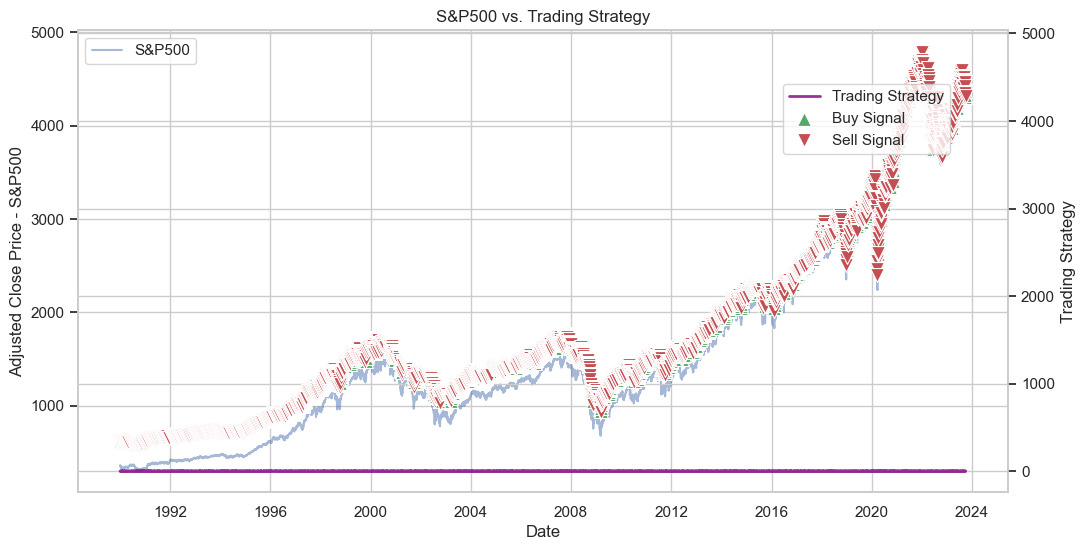

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define functions

def momentum_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create signals based on your strategy
    signals['signal'][data['Adj Close'].pct_change() > 0] = 1.0
    signals['signal'][data['Adj Close'].pct_change() < 0] = -1.0

    # Forward fill the signals to represent when to stay invested
    signals['positions'] = signals['signal'].ffill().fillna(0)

    # Print the signals DataFrame
    print("Signals DataFrame:")
    print(signals)

    return signals

def combine_data_strategy(data, signals):
    # Combine S&P500 data with trading strategy signals
    combined_data = pd.concat([data['Adj Close'], signals['positions']], axis=1)
    combined_data.columns = ['S&P500', 'Trading Strategy']

    return combined_data

def plot_combined_data(combined_data):
    plt.figure(figsize=(12, 6))

    # Plot S&P500 data
    ax1 = sns.lineplot(data=combined_data['S&P500'], label='S&P500', alpha=0.5)

    # Create a twin axis for the trading strategy
    ax2 = ax1.twinx()

    # Plot trading strategy as a separate line
    sns.lineplot(data=combined_data['Trading Strategy'], label='Trading Strategy', color='purple', alpha=0.8, linewidth=2, ax=ax2)

    # Highlight buy/sell signals on the trading strategy line
    sns.scatterplot(x=combined_data.index[combined_data['Trading Strategy'] == 1], y=combined_data['S&P500'][combined_data['Trading Strategy'] == 1],
                    marker='^', s=100, color='g', label='Buy Signal', ax=ax2)
    sns.scatterplot(x=combined_data.index[combined_data['Trading Strategy'] == -1], y=combined_data['S&P500'][combined_data['Trading Strategy'] == -1],
                    marker='v', s=100, color='r', label='Sell Signal', ax=ax2)

    plt.title('S&P500 vs. Trading Strategy')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price - S&P500')
    ax2.set_ylabel('Trading Strategy')
    plt.legend(loc='upper left', bbox_to_anchor=(0.75, 0.9))  # Adjust the legend position
    plt.show()

# Download historical data
symbol = "^GSPC"  # S&P500 symbol
start_date = "1990-01-01"
end_date = "2023-09-30"
data = yf.download(symbol, start=start_date, end=end_date)

# Call the momentum_strategy function
momentum_signals = momentum_strategy(data)

# Combine S&P500 data with trading strategy signals
combined_data = combine_data_strategy(data, momentum_signals)

# Plot the combined data on the same chart
plot_combined_data(combined_data)
